### Data preperation

In [1]:
import pandas as pd

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
dataset = pd.read_csv("dataset.csv")


In [4]:
dataset.count()

qid              1306122
question_text    1306122
target           1306122
dtype: int64

In [4]:
# dataset = dataset1[:100000]

In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB
None


In [6]:
print(dataset['question_text'].describe())

count                                               1306122
unique                                              1306122
top       How did Quebec nationalists see their province...
freq                                                      1
Name: question_text, dtype: object


In [7]:
print(dataset['target'].describe())

count    1.306122e+06
mean     6.187018e-02
std      2.409197e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: target, dtype: float64


In [4]:
dataset.loc[dataset['target']== 0]

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [8]:
dataset["question_text"][0]

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [11]:
dataset["question_text"][22]

'Has the United States become the largest dictatorship in the world?'

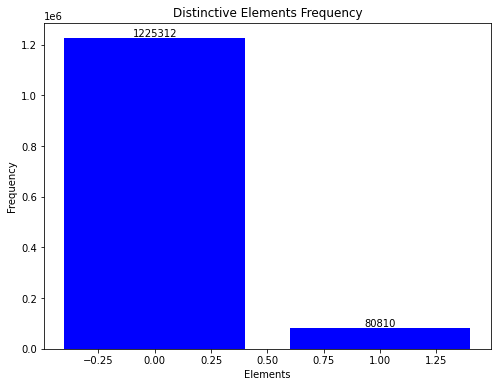

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have already defined dataset and imported necessary libraries

# Counting the frequency of each class in the dataset
element_count = Counter(dataset['target'])

# Extracting elements and their counts
elements = list(element_count.keys())
counts = list(element_count.values())

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(elements, counts, color='blue')
plt.xlabel('Elements', color="black")  # Change the color of the x-axis label
plt.ylabel('Frequency', color="black")  # Change the color of the y-axis label
plt.title('Distinctive Elements Frequency', color="black")  # Change the color of the title

# Change the font color of the tick labels on the x and y axes
plt.xticks(color="black")
plt.yticks(color="black")

# Change the font color of the counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', color="black")

plt.show()

In [3]:
import pandas as pd
import numpy as np



# Check class distribution
class_distribution = dataset['target'].value_counts()
print("Class Distribution Before Balancing:")
print(class_distribution)

# Determine the majority class and minority class
majority_class = class_distribution.idxmax()
minority_class = class_distribution.idxmin()
print(minority_class)

# Get the number of samples in the majority class
majority_class_count = class_distribution[majority_class]
minority_class_count = class_distribution[minority_class]
print(minority_class_count)

# Find indices of majority class samples
majority_indices = dataset[dataset['target'] == majority_class].index

# Randomly select majority class samples to drop
drop_indices = np.random.choice(majority_indices, size=majority_class_count - minority_class_count, replace=False)

# Drop selected majority class samples
balanced_df = dataset.drop(drop_indices)

# Check class distribution after balancing
balanced_class_distribution = balanced_df['target'].value_counts()
print("\nClass Distribution After Balancing:")
print(balanced_class_distribution)


Class Distribution Before Balancing:
target
0    1225312
1      80810
Name: count, dtype: int64
1
80810

Class Distribution After Balancing:
target
0    80810
1    80810
Name: count, dtype: int64


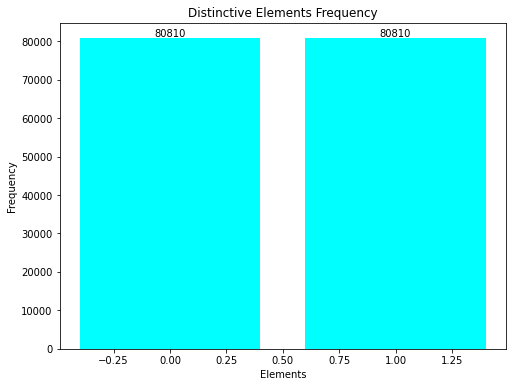

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have already defined dataset and imported necessary libraries

# Counting the frequency of each class in the dataset
element_count = Counter(balanced_df['target'])

# Extracting elements and their counts
elements = list(element_count.keys())
counts = list(element_count.values())

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(elements, counts, color='cyan')
plt.xlabel('Elements', color="black")  # Change the color of the x-axis label
plt.ylabel('Frequency', color="black")  # Change the color of the y-axis label
plt.title('Distinctive Elements Frequency', color="black")  # Change the color of the title

# Change the font color of the tick labels on the x and y axes
plt.xticks(color="black")
plt.yticks(color="black")

# Change the font color of the counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', color="black")

plt.show()

In [281]:
#preprocessing text
import nltk
from nltk.tokenize import word_tokenize # 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# clean data และจัดการข้อความให้อยู่ในรูปแบบที่ง่ายต่อการเรียนรู้
# เราจะใช้ library nltk ทำขั้นตอน preprocess ดังนี้
# tokenization
# stopword removal
# stemming by using porter stemmer

porter = PorterStemmer()
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
#     print(filtered_tokens)
    return " ".join(filtered_tokens)

# preprocess all training data
X_preprocessed = [preprocess_text(text) for text in balanced_df['question_text']]



### สร้าง Vector ของคำศัพท์ (Vectorizer)

In [298]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# #divide dataset into to two pieces cosisted of training part and test part
sentences_train, sentences_test, y_train, y_test = train_test_split(X_preprocessed,balanced_df['target'] , 
                                                                    test_size=0.25,shuffle= False ,
                                                                   random_state=100)


# ## สร้างคำศัพท์ที่ใช้เป็น feature จากข้อมูล train
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index




In [313]:
print(vocab_size)
# print(sentences_train[0])
print(X_train[0])
# print(balanced_df['question_text'][2])

50870
[3819, 545, 28, 3819, 545, 577, 7154]


In [38]:
           # จำนวน feature = จำนวน vocab = 114950
        # จำนวน sentence = 979591

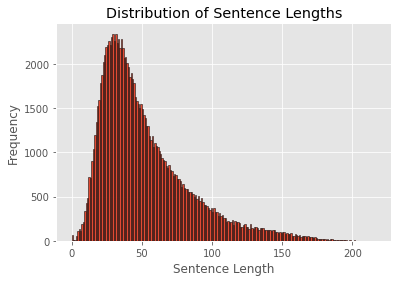

Mean length: 51.62382543414594
Median length: 43.0
Mode length: 29
Standard deviation: 32.010246316739135
Max Length:  217


In [311]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Calculate the lengths of each sentence
sentence_length = [len(sentence) for sentence in sentences_train]

# Plotting the histogram
plt.hist(sentence_length, bins=range(min(sentence_length), max(sentence_length) + 1), edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.grid(True)
plt.show()


# Calculate mean, median, and standard deviation
mean_length = np.mean(sentence_length)
max_len = np.max(sentence_length)
median_length = np.median(sentence_length)
mode_length = statistics.mode(sentence_length)
std_deviation = np.std(sentence_length)

print("Mean length:", mean_length)
print("Median length:", median_length)
print("Mode length:", mode_length)
print("Standard deviation:", std_deviation)
print("Max Length: ", max_len)

In [187]:
unique_length = set(sentence_length)
print(list(unique_length))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 191, 206, 207, 208]


#### padding

In [316]:
from keras.preprocessing import sequence

max_len = 217 # most of sentences' length statistically lay between 10-100, but this case will choose 217 max values

X_train_padded = sequence.pad_sequences(X_train,padding='post', maxlen= max_len)
X_test_padded = sequence.pad_sequences(X_test,padding='post', maxlen = max_len)

print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))


X_train vector shape = (121215, 217)
X_test vector shape = (40405, 217)


In [317]:
print(X_train_padded[0])

[3819  545   28 3819  545  577 7154    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

#### สร้างตัวจำแนก classifier โดยเลือกใช้ (Deep) Neural Networks

In [320]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.backend import clear_session
from IPython.display import Image

clear_session()

input_dimension = 50870 # based on total amount of vocabulary

model = Sequential()

# adding layers on top of one another

model.add(Embedding(input_dim=input_dimension , output_dim=100, input_length=max_len))#embedding layer
#consider output_dimension as hyperparameter ,then 128 was the best tunning value of output_dim 
model.add(Flatten()) #layer 1(flatten layer)
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.25))
# model.add(Dense(10, activation="relu"))
# model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # dense layer , use sigmoid function to produce 1 or 0 output

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) # use binary_crossentropy loss function for binary target classification
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 217, 100)          5087000   
                                                                 
 flatten (Flatten)           (None, 21700)             0         
                                                                 
 dense (Dense)               (None, 10)                217010    
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5304021 (20.23 MB)
Trainable params: 5304021 (20.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Architecture

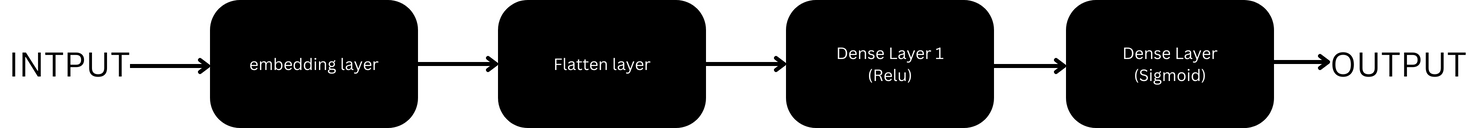

In [21]:
Image(filename='/Users/darasroin/Downloads/embeddinglayer.png')

In [321]:
score = model.fit(x=X_train_padded, y= y_train, 
                      epochs=5,
                     verbose=True,
                     validation_data=(X_test_padded, y_test),
                     batch_size=100)

Epoch 1/5
1213/1213 [==============================] - 53s 43ms/step - loss: 0.4610 - accuracy: 0.7432 - val_loss: 0.3232 - val_accuracy: 0.8775
Epoch 2/5
1213/1213 [==============================] - 53s 43ms/step - loss: 0.3553 - accuracy: 0.8458 - val_loss: 0.3075 - val_accuracy: 0.8788
Epoch 3/5
1213/1213 [==============================] - 52s 43ms/step - loss: 0.3049 - accuracy: 0.8782 - val_loss: 0.3235 - val_accuracy: 0.8751
Epoch 4/5
1213/1213 [==============================] - 54s 45ms/step - loss: 0.2614 - accuracy: 0.8904 - val_loss: 0.3393 - val_accuracy: 0.8686
Epoch 5/5
1213/1213 [==============================] - 50s 42ms/step - loss: 0.2079 - accuracy: 0.9228 - val_loss: 0.4134 - val_accuracy: 0.8635


In [167]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

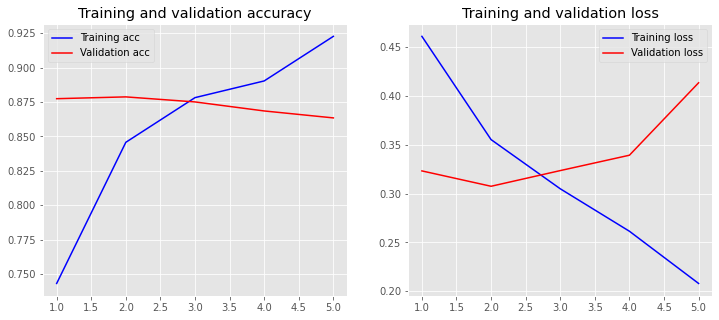

In [322]:
plot_history(score)

In [324]:
loss, accuracy = model.evaluate(X_train_padded, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9480
Testing Accuracy:  0.8635


In [327]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import GlobalMaxPool1D, GlobalMaxPool2D
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.backend import clear_session
from keras.layers import Dense, Dropout
clear_session()

input_dimension = 35731 # based on total amount of vocabulary

model = Sequential()

# adding layers on top of one another

model.add(Embedding(input_dim=input_dimension , output_dim=100, input_length=max_len))#embedding layer
#consider output_dimension as hyperparameter ,then 128 was the best tunning value of output_dim 

model.add(Conv1D(64 , 5 , activation='relu')) # to extract important features into smaller scale... 
model.add(Dropout(0.5))
model.add(GlobalMaxPool1D())#layer 1(Global Max Pool)

model.add(Dense(10, activation = 'relu' ))
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # dense layer , use sigmoid function to produce 1 or 0 output

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) # use binary_crossentropy loss function for binary target classification
model.summary()

# parameters calculation
# embedding layer : 29853 x 100
# conv1d : 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 217, 100)          3573100   
                                                                 
 conv1d (Conv1D)             (None, 213, 64)           32064     
                                                                 
 dropout (Dropout)           (None, 213, 64)           0         
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

In [328]:
score = model.fit(x=X_train_padded, y= y_train, 
                      epochs=5,
                     verbose=True,
                     validation_data=(X_test_padded, y_test),
                     batch_size=100)

Epoch 1/5
1213/1213 [==============================] - 100s 82ms/step - loss: 0.3421 - accuracy: 0.8592 - val_loss: 0.3438 - val_accuracy: 0.8743
Epoch 2/5
1213/1213 [==============================] - 107s 88ms/step - loss: 0.2720 - accuracy: 0.8933 - val_loss: 0.3343 - val_accuracy: 0.8727
Epoch 3/5
1213/1213 [==============================] - 107s 88ms/step - loss: 0.2321 - accuracy: 0.9114 - val_loss: 0.3303 - val_accuracy: 0.8706
Epoch 4/5
1213/1213 [==============================] - 108s 89ms/step - loss: 0.1951 - accuracy: 0.9255 - val_loss: 0.3393 - val_accuracy: 0.8675
Epoch 5/5
1213/1213 [==============================] - 110s 91ms/step - loss: 0.1633 - accuracy: 0.9373 - val_loss: 0.3643 - val_accuracy: 0.8625


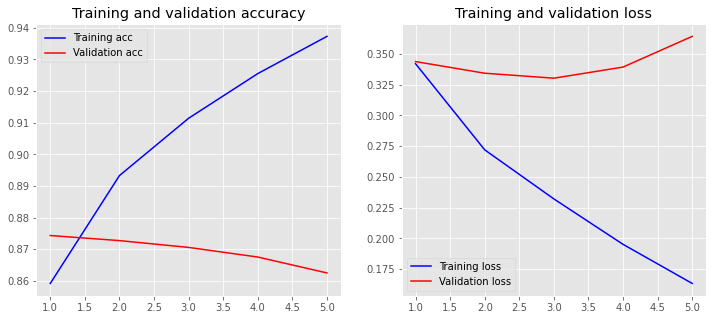

In [329]:
plot_history(score)

In [332]:
predicted = model.predict(X_test_padded)

1263/1263 [==============================] - 4s 3ms/step


In [335]:
predicted = [1 if predict >= 0.5 else 0 for predict in predicted]

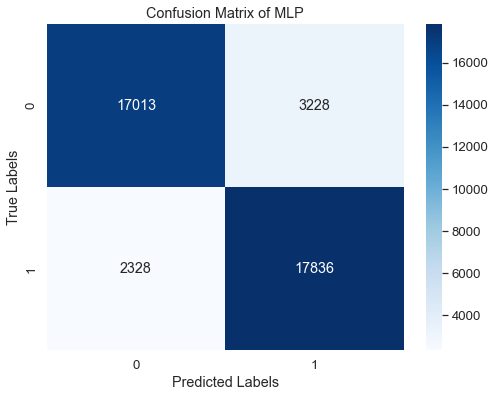

In [338]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of MLP')
plt.show()

In [339]:
loss, accuracy = model.evaluate(X_train_padded, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9600
Testing Accuracy:  0.8625
